In [155]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

In [156]:
df = pd.read_csv("Sugarcane Production.csv")

In [157]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [158]:
df.shape

(103, 7)

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  103 non-null    int64 
 1   Country                     103 non-null    object
 2   Continent                   103 non-null    object
 3   Production (Tons)           103 non-null    object
 4   Production per Person (Kg)  103 non-null    object
 5   Acreage (Hectare)           102 non-null    object
 6   Yield (Kg / Hectare)        102 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.8+ KB


Data Cleaning

In [160]:
df.isnull().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [161]:
df = df.dropna()

In [162]:
df.shape

(102, 7)

In [163]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


Removing the extra decimals and unwanted commas in columns

In [164]:
df['Production (Tons)'] = df['Production (Tons)'].str.replace('.','')
df['Production per Person (Kg)'] = df['Production per Person (Kg)'].str.replace('.','').str.replace(',','.')
df['Acreage (Hectare)'] = df['Acreage (Hectare)'].str.replace('.','')
df['Yield (Kg / Hectare)'] = df['Yield (Kg / Hectare)'].str.replace('.','').str.replace(',','.')

In [165]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


Renaming the column names since it is difficult to work with spaces involved

In [166]:
df.rename(columns= {'Production (Tons)' : 'Production(Tons)', 'Production per Person (Kg)' : 'Production_per_Person(Kg)', 'Acreage (Hectare)' : 'Acreage(Hectare)','Yield (Kg / Hectare)':'Yield(Kg / Hectare)' }, inplace = True)

In [167]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [168]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [169]:
df.reset_index(drop = True, inplace = True)

Datatypes

In [170]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg / Hectare)          object
dtype: object

In [173]:
df['Acreage(Hectare)'] = df['Acreage(Hectare)'].astype(float)
df['Production(Tons)'] = df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)'] = df['Production_per_Person(Kg)'].astype(float)
df['Yield(Kg / Hectare)'] = df['Yield(Kg / Hectare)'].astype(float)

In [174]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg / Hectare)          float64
dtype: object

In [175]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_Person(Kg)    101
Acreage(Hectare)             101
Yield(Kg / Hectare)          102
dtype: int64

Analysis

In [176]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


<Axes: xlabel='Continent'>

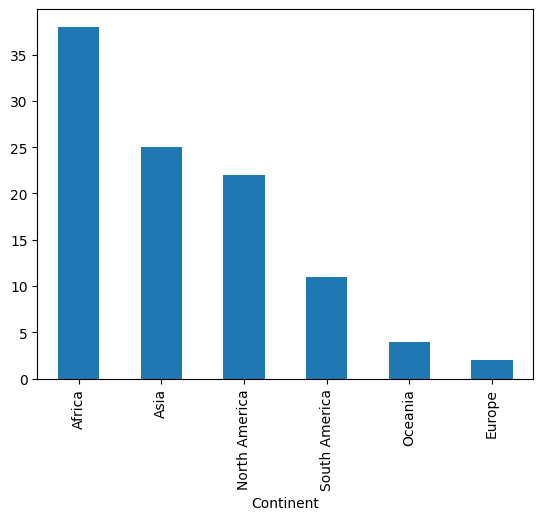

In [177]:
df['Continent'].value_counts().plot(kind = 'bar')

Distribution of Columns

C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_19020\2780832796.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production(Tons)'])
C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_19020\2780832796.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Production_per_Person

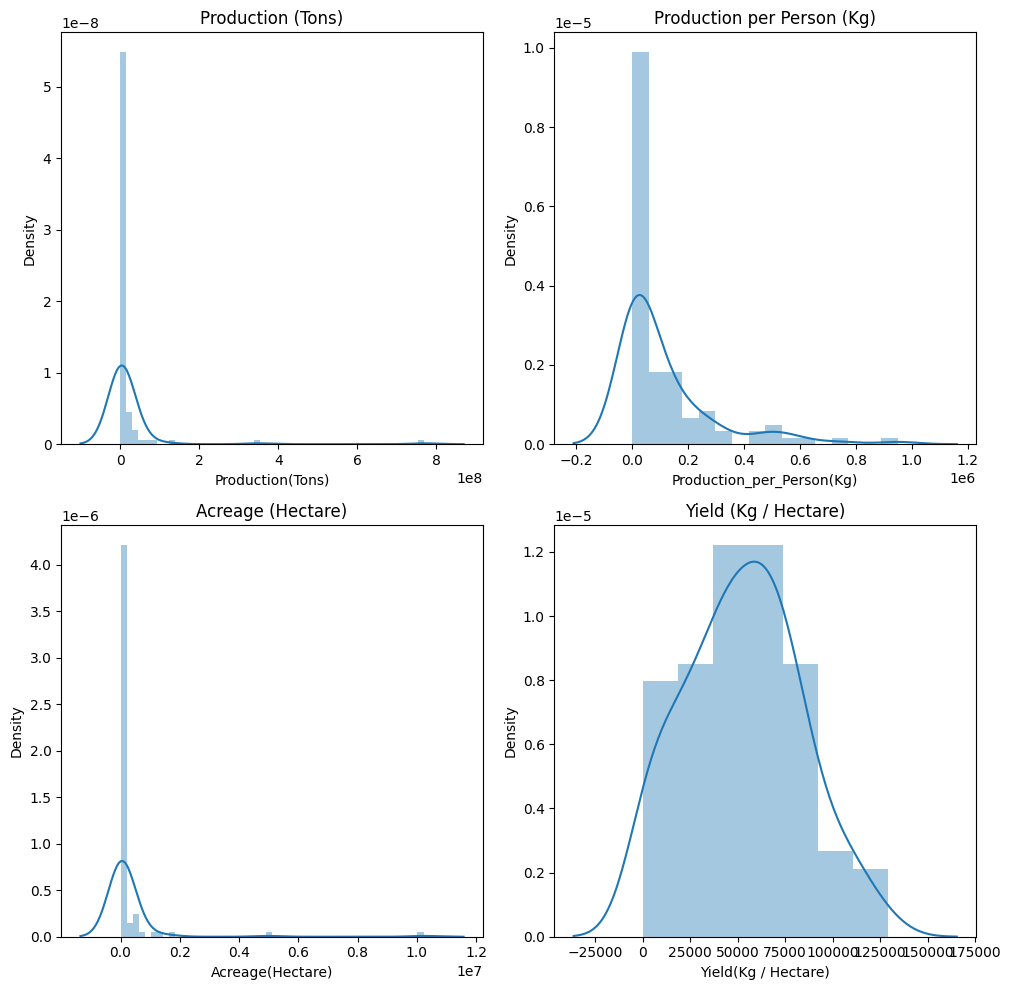

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and has the required columns

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.distplot(df['Production(Tons)'])
plt.title('Production (Tons)')

plt.subplot(2, 2, 2)
sns.distplot(df['Production_per_Person(Kg)'])
plt.title('Production per Person (Kg)')

plt.subplot(2, 2, 3)
sns.distplot(df['Acreage(Hectare)'])
plt.title('Acreage (Hectare)')

plt.subplot(2, 2, 4)
sns.distplot(df['Yield(Kg / Hectare)'])
plt.title('Yield (Kg / Hectare)')

plt.tight_layout()
plt.show()


Checking for outliers

c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\G Vijayalakshmi\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and 

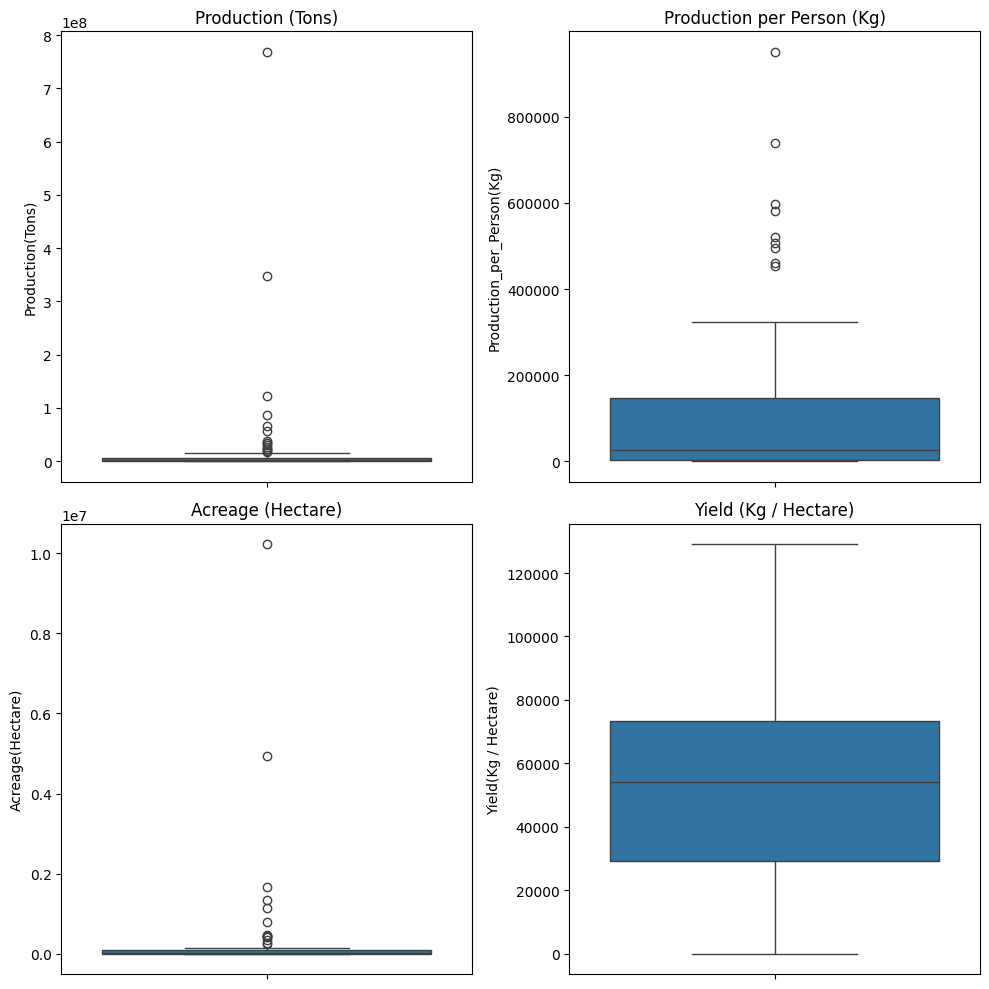

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and has the required columns

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.boxplot(df['Production(Tons)'])
plt.title('Production (Tons)')

plt.subplot(2, 2, 2)
sns.boxplot(df['Production_per_Person(Kg)'])
plt.title('Production per Person (Kg)')

plt.subplot(2, 2, 3)
sns.boxplot(df['Acreage(Hectare)'])
plt.title('Acreage (Hectare)')

plt.subplot(2, 2, 4)
sns.boxplot(df['Yield(Kg / Hectare)'])
plt.title('Yield (Kg / Hectare)')

plt.tight_layout()
plt.show()


In [180]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
count,1.020000e+02,102.000000,1.020000e+02,102.000000
mean,1.850372e+07,112952.435755,2.498981e+05,52628.078431
std,8.419149e+07,176651.341929,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,6.251875e+04,3671.910000,1.104000e+03,29072.025000
50%,1.440044e+06,25572.500000,1.655800e+04,54108.950000
75%,6.426824e+06,146384.750000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


Which country has more production

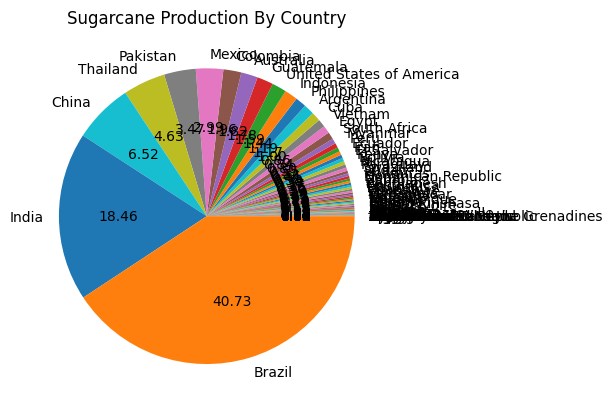

In [201]:
df.groupby('Country')['Production(Tons)'].sum().sort_values().plot(kind = 'pie', autopct = '%.2f')
plt.title('Sugarcane Production By Country')
plt.ylabel('')
plt.show()

In [203]:
df_new = df[['Production(Tons)','Country']].set_index('Country')

In [206]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


<Axes: xlabel='Country'>

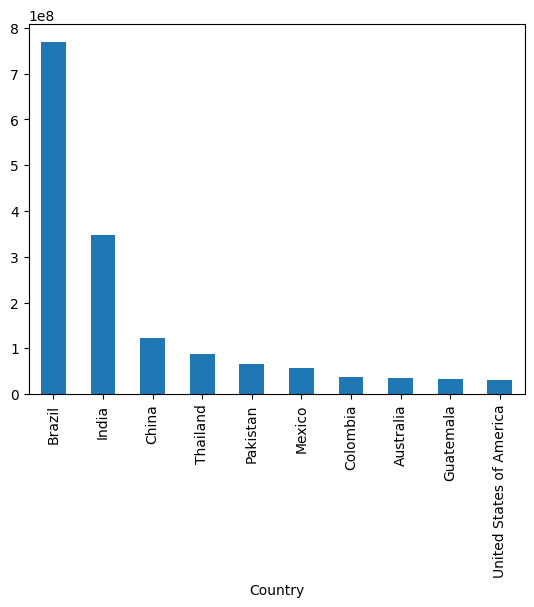

In [205]:
df_new['Production(Tons)'].head(10).plot(kind = 'bar')

Which Country has Maximum Land

C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_19020\3862588472.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


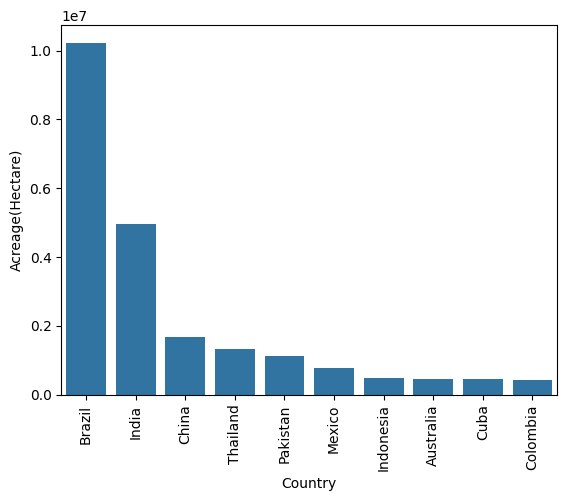

In [217]:
df_acr = df.sort_values('Acreage(Hectare)', ascending=False)
ax = sns.barplot(data =  df_acr.head(10), x = 'Country', y= 'Acreage(Hectare)')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Which Country has Maximum Production

C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_19020\1721427247.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


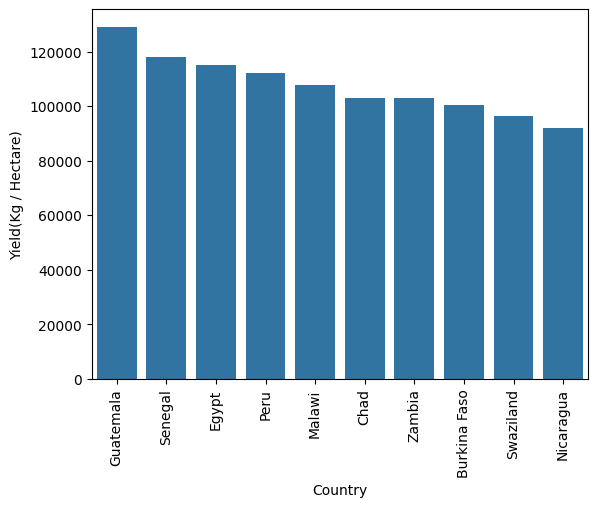

In [219]:
df_yeild = df.sort_values('Yield(Kg / Hectare)', ascending=False)
ax = sns.barplot(data =  df_yeild.head(10), x = "Country", y= "Yield(Kg / Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Which Country has the highest Production per Kg

C:\Users\G Vijayalakshmi\AppData\Local\Temp\ipykernel_19020\4026813065.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)


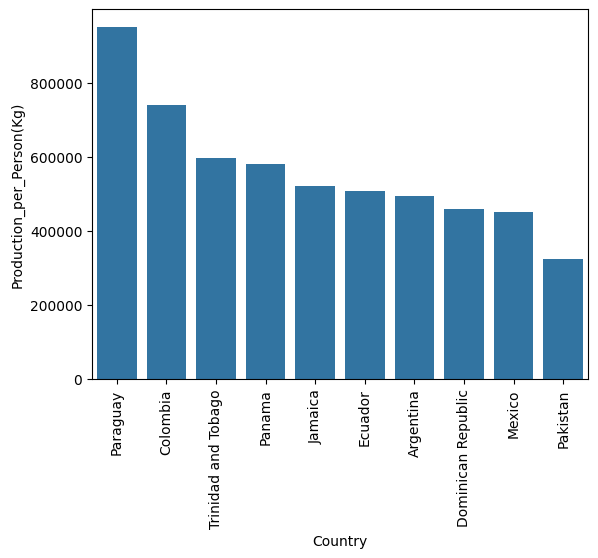

In [220]:
df_person = df.sort_values('Production_per_Person(Kg)', ascending=False)
ax = sns.barplot(data =  df_person.head(10), x = "Country", y= "Production_per_Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.show()

Correlation

In [227]:
df_corr = df.drop(['Country','Continent'], axis=1)
df_corr.corr()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg / Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_Person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg / Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

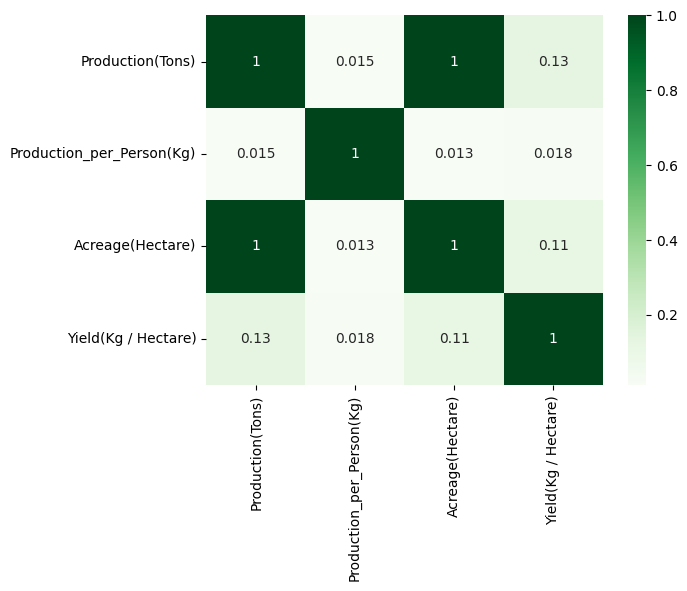

In [228]:
sns.heatmap(df_corr.corr(), annot=True, cmap="Greens")

Conclusion: Countries with more land produce more Sugarcane (Since Correlation is 1)

<Axes: xlabel='Production(Tons)', ylabel='Acreage(Hectare)'>

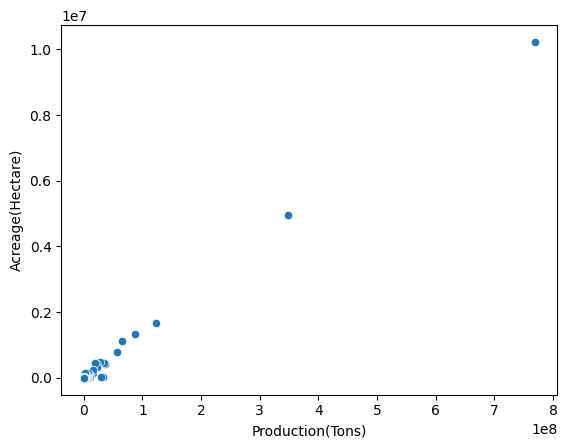

In [229]:
sns.scatterplot(data=df,x= 'Production(Tons)', y='Acreage(Hectare)')

Analysis For Continent 

In [240]:
df['Continent'].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

Which Continent Produce more Sugarcane 

In [241]:
df_continent = df.groupby('Continent').sum()


<Axes: xlabel='Continent'>

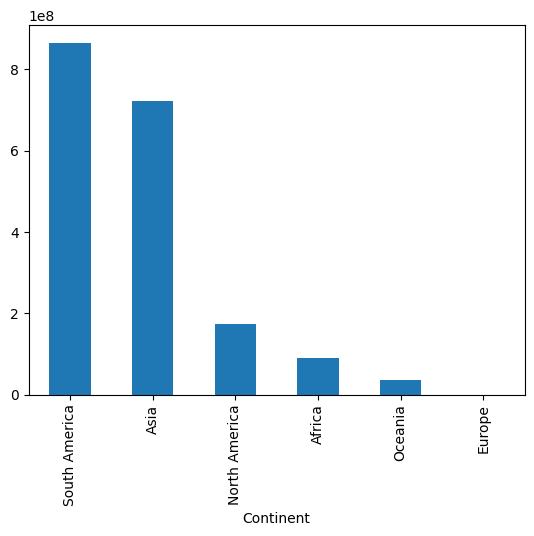

In [242]:
df_continent['Production(Tons)'].sort_values(ascending= False).plot(kind = 'bar')

Which Continent Has More Land

<Axes: xlabel='Continent'>

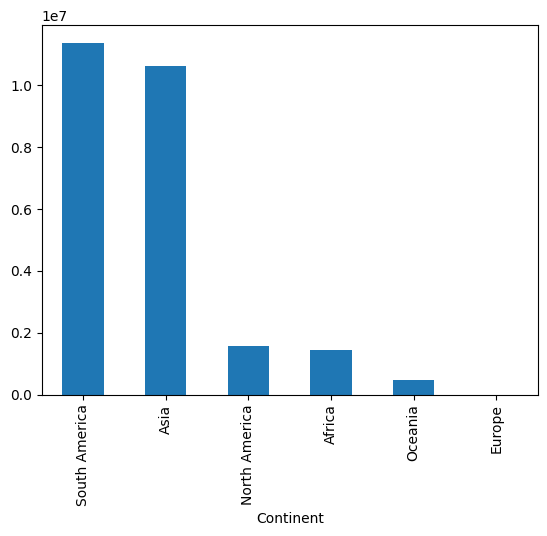

In [243]:
df_continent['Acreage(Hectare)'].sort_values(ascending= False).plot(kind='bar')

Text(0, 0.5, '')

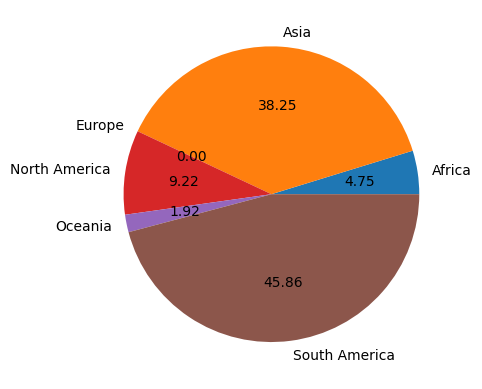

In [246]:
df_continent['Production(Tons)'].plot(kind = 'pie', autopct = '%.2f')
plt.ylabel('')